# Correlation, Regression and Multicollinearity

Here you'll practice some of the concepts from the previous lesson and begin to investigate multicollinearity in your data. **Multicollinearity is when features in your X space have correlation with each other.**  This can lead to some interesting problems in regression where it is difficult to determine precise coefficient weights for the various features. The general idea is that with the highly correlated features, you can get nearly identical performance with different combinations of those correlated features; 1 of this and 1 of that, 2 of this and none of that, 1.5 of this and .5 of that, 50 of this and -48 of that all would produce the same result if our two features are perfectly correlated.

In the following, we break down and demonstrate these concepts in more detail.

### Standard Package Imports

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Practice Merging

As with the previous class, practice importing and merging two datasets. The two datasets are in two files: **Walmart_Sales_Forecasting.csv** and **features.csv**. Import both of these with pandas and then merge the two into a single master dataframe. (The two columns you should merge on are date and store number.)

In [ ]:
# Your code here
# Import and merge the two files.

## pd.plotting.scater_matrix()
Another very useful built in pandas feature is the scatter matrix method.  
You can use this to both examine the pairwise relations between columns as well as the distribution of individual features along the diagonal. 

For example, notice how **'MarkDown1** and **MarkDown4** appear to have some substantial correlation. Also notice the histograms along the diagonal; these are the distributions of the various variables. For example, Store in the upper left is relatively uniform (we have roughly equal amounts of data for the various store numbers), and Temperature is roughly normally distributed. In contrast, most of the MarkDown features have a high degree of skew (there are a few high outliers but most of the data falls within a much smaller range).

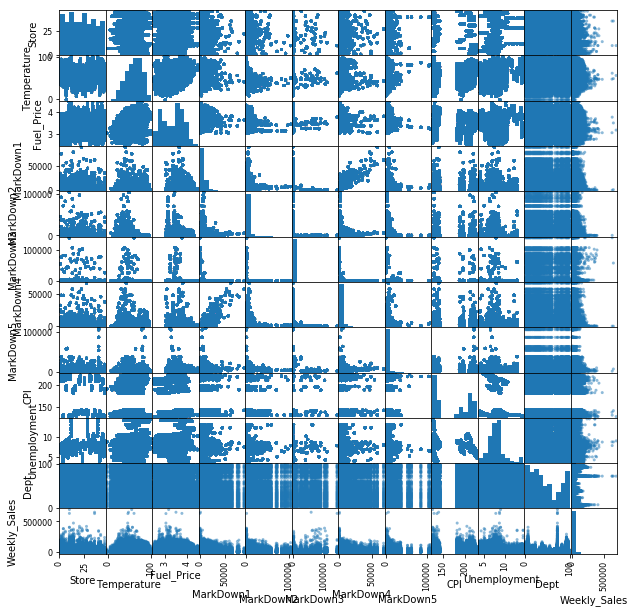

In [18]:
#Warning: This will take several minutes to generate! (May also freeze computers with limited specs)
pd.plotting.scatter_matrix(df.drop('IsHoliday', axis=1), figsize=(15,15));

## Correlation
As we can see, there's quite a bit of correlated features here!  
We can also further investigate a single relationship between two variables with the **plt.scatter(x,y)** method or calculte the pearson correlation coefficient with numpy's built in **np.corrcoeff()** method:

[[nan nan]
 [nan nan]]


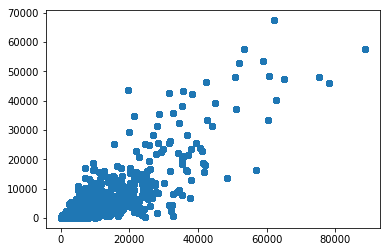

In [24]:
x , y = df.MarkDown1, df.MarkDown4
print(np.corrcoef(x,y))
plt.scatter(x,y)

[[1.         0.81923816]
 [0.81923816 1.        ]]


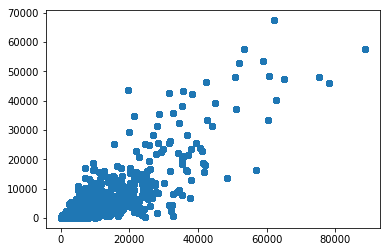

In [27]:
temp = df[(~df.MarkDown1.isnull())
         & (~df.MarkDown4.isnull())]
x , y = temp.MarkDown1, temp.MarkDown4
print(np.corrcoef(x,y))
plt.scatter(x,y)

## Correlation versus causation
As you may have heard before, correlation does not equal causation. One fun example of this is ice cream sales and shark attacks. We have a bizarre dataset recording ice cream sales and shark attacks on given days at various beach towns, and plotting the two we notice a distinct correlation between the two. This does not mean that more ice sales causes more shark attacks to happen. In this case, both variables (ice cream sales and shark attacks) are correlated with a third feature we have yet to examine: temperature. In summer, as the temperature rises, both ice cream sales and shark attacks increase while in winter, there are comparitively few of both. In sum, don't assume that just because two variables are correlated that there is any direct causal relation between the two.

## Multicollinearity
Multicollinearity is when we have multiple predictive variables which are highly correlated. This leads to a number of issues when we then go to perform regression (which we will investigate in more depth!) 

In our current example, MarkDown1 and MarkDown4 were highly correlated which will greatly impact our regression analysis. Let's investigate this briefly.

# Regression
Regression algorithms are designed to predict a numeric value. That could be the anticipated number of votes for a candidate, the gross sales for a product, the value of a home, or the number of yelp review for a restaurant. If you're trying to predict a numerical value, you'll want to use a regression algorithm. You may have seen simple linear regression in a previous class. This type of regression is known as ordinary least squares; it determines a line of best fit by minimizing the sum of squares of the errors between the models predictions and the actual data. In algebra and statistics classes, this is often limited to the simple 2 variable case of y=mx+b, but this process can be generalized to use multiple predictive variables. While there can be a lot of underlying mathematics, Python and SKlearn make generating and tuning these models incredibly straightforward. Here's a general outline:  
* Import packages
* Define X and y; X can be multiple columns, y is what you want to predict
    * X must have null values removed
* Initialize a regression object
* Fit a regression model
* Use your regression model to generate predictions
* Measure the accuracy of your model's predictions

In [49]:
df.head(2)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27


In [50]:
df.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Dept', 'Weekly_Sales'],
      dtype='object')

In [51]:
#1) Import packages
from sklearn.linear_model import LinearRegression

#2) Define X and y
X = df[['Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
        'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Dept']] #Only numeric features work

y = df['Weekly_Sales']

#3) Initialize a regression object
linreg = LinearRegression()

# 4) Fit the model
linreg.fit(X, y)

# 5) Use the model to predict outputs
df['Estimated_Weekly_Sales'] = linreg.predict(X)

# 6) Measure performance
# Here we print the model's R^2 to measure overall performance; the correlation between our model and the data
print('R^2 model score:', linreg.score(X,y), '\n')

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## Handling Null Values

As you can see, the model won't run with Null values in our dataset. There are many ways to handle null values including imputing methods such as using the average or median. For now, we'll simply remove all null values from X.

In [52]:
df = df.dropna()

## Reruning the Modeling Process

In [54]:
# Code from above

#1) Import packages
from sklearn.linear_model import LinearRegression

#2) Define X and y
X = df[['Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
        'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Dept']] #Only numeric features work

y = df['Weekly_Sales']

#3) Initialize a regression object
linreg = LinearRegression()

# 4) Fit the model
linreg.fit(X, y)

# 5) Use the model to predict outputs
df['Estimated_Weekly_Sales'] = linreg.predict(X)

# 6) Measure performance
# Here we print the model's R^2 to measure overall performance; the correlation between our model and the data
print('R^2 model score:', linreg.score(X,y), '\n')

#Print the coefficients for the model's formula
print('Model feature coefficients:')
weight_dict = dict(zip(X.columns, linreg.coef_))
for feat, coeff in list(zip(X.columns, linreg.coef_)):
    print(feat, 'Coefficient weight: {}'.format(round(coeff, 4)))

R^2 model score: 0.034802219578679794 

Model feature coefficients:
Store Coefficient weight: -108.1617
Temperature Coefficient weight: 38.4918
Fuel_Price Coefficient weight: -827.9562
MarkDown1 Coefficient weight: 0.1411
MarkDown2 Coefficient weight: 0.0635
MarkDown3 Coefficient weight: 0.1624
MarkDown4 Coefficient weight: -0.0512
MarkDown5 Coefficient weight: 0.2407
CPI Coefficient weight: -30.2301
Unemployment Coefficient weight: -615.576
Dept Coefficient weight: 112.2021


# Problems with multicollinearity
There are a few considerations to keep in mind when it comes to interpreting regression models based on underlying data with multicollinearity. *One is that the coefficients in the model themselves lose interpretability.* Under ideal conditions, we would like to interpret our coefficients literally. For example, the coefficient associated with temperature is 38.49. If this coefficient were stable, we could say something along the lines "as a the temperature goes up by 1, the weekly sales goes up by 38.49. Unfortunately, with multicollinearity, we cannot make such claims. That is because the coefficients associated with weights that are highly correlated may vary widely. For example, observe what happens to the coefficients when we remove a feature with correlation to others:

In [55]:
# Code from above

#1) Import packages
from sklearn.linear_model import LinearRegression

#2) Define X and y
#Removed MarkDown4
X = df[['Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
        'MarkDown5', 'CPI', 'Unemployment', 'Dept']] #Only numeric features work

y = df['Weekly_Sales']

#3) Initialize a regression object
linreg = LinearRegression()

# 4) Fit the model
linreg.fit(X, y)

# 5) Use the model to predict outputs
df['Estimated_Weekly_Sales'] = linreg.predict(X)

# 6) Measure performance
# Here we print the model's R^2 to measure overall performance; the correlation between our model and the data
print('R^2 model score:', linreg.score(X,y), '\n')

#Save results
new_weight_dict = dict(zip(X.columns, linreg.coef_))

#Print the coefficients for the model's formula
print('Model feature coefficients:')
for feat, coeff in list(zip(X.columns, linreg.coef_)):
    print(feat, 'Coefficient weight: {}'.format(round(coeff, 4)))

R^2 model score: 0.03473682576876003 

Model feature coefficients:
Store Coefficient weight: -108.0325
Temperature Coefficient weight: 39.7291
Fuel_Price Coefficient weight: -692.1175
MarkDown1 Coefficient weight: 0.1078
MarkDown2 Coefficient weight: 0.0658
MarkDown3 Coefficient weight: 0.1621
MarkDown5 Coefficient weight: 0.2407
CPI Coefficient weight: -29.8958
Unemployment Coefficient weight: -612.1828
Dept Coefficient weight: 112.1943


What this goes to demonstrate is that some of these coefficients are unstable and depend on what other features are incorporated into the model. Adding additional features that are correlated with features already added will never reduce the overall performance of the model, but can be thought of as 'not adding much new information'. In this way, adding correlated features is unlikely to drastically increase model performance to any substantial degree. This also makes it difficult to judge the importance of a particular variable; the importance of the variable depends on what variables are already present (if other variables already exist which are highly correlated, then the variable will again add little predictive information).

In [59]:
weights = pd.DataFrame.from_dict(weight_dict, orient='index').reset_index()
weights.columns = ['Feature', 'Original_Weight']
weights['New_Weight'] = weights.Feature.map(new_weight_dict)
weights['Change'] = np.abs(weights['New_Weight'] - weights['Original_Weight']) #Net change (absolute value)
weights = weights.sort_values(by='Change', ascending=False)
weights['MkDwn4_Corr'] = weights.Feature.map(lambda feat: np.corrcoef(df.MarkDown4, df[feat])[0][1])
weights['Percent_Change'] = weights.Change / weights.Original_Weight
weights.sort_values(by='Percent_Change', ascending=False)

,Feature,Original_Weight,New_Weight,Change,MkDwn4_Corr,Percent_Change
3,MarkDown1,0.141131,0.107823,0.033308,0.828928,0.236005
4,MarkDown2,0.063488,0.065768,0.002280,-0.017517,0.035913
1,Temperature,38.491844,39.729088,1.237244,-0.057895,0.032143
5,MarkDown3,0.162446,0.162095,0.000351,-0.080216,0.002158
7,MarkDown5,0.240696,0.240669,0.000027,0.101114,0.000114
10,Dept,112.202109,112.194276,0.007833,0.004650,0.000070
0,Store,-108.161678,-108.032453,0.129226,0.002050,-0.001195
9,Unemployment,-615.575960,-612.182834,3.393126,0.018817,-0.005512
8,CPI,-30.230099,-29.895812,0.334287,-0.041662,-0.011058
2,Fuel_Price,-827.956231,-692.117515,135.838715,-0.025784,-0.164065


Also notice how MarkDown1, the feature with the highest correlation to MarkDown4, which we removed, is the coefficient that changes the largest proportionally. This shows how the original coefficient weight was impacted by the highly correlated feature.

## Dummy Variables

Another huge problem with our current model is the data we have fed into it. Specifically, we passed two columns, Store and department which were numeric, but are really more of categorical variables then quantities on a discrete or continuous scale. For example, store 2 and store 1 aren't really numeric quantities, they are simply labels designating which store A or B, we are talking about. The proper way to encode this data is as binary flags (0 or 1) designating 'Is_This_Store_A?' and 'Is_This_Store_B'. This will lead to a large number of new columns, one for each possible value that a categorical variable would take on. For example, we have 45 stores in our dataset, so this will require 45 new columns, one for each store. Each of these columns will then have a binary variable (0 or 1) that will indicate whether that particular data point is associated with that particular store. While this may sound like a lot of tedious work in practice, pandas has a useful built in feature called **get_dummies()** which makes this process easy.

### Before Transformation

In [63]:
df.Store.head()

6587    1
6588    1
6589    1
6590    1
6591    1
Name: Store, dtype: int64

### After Transformation

In [62]:
pd.get_dummies(df.Store).head()

,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
6587,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6588,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6589,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6590,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6591,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
df.head(2)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Estimated_Weekly_Sales
6587,1,2011-11-11,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,1,18689.54,14168.563441
6588,1,2011-11-11,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,2,44936.47,14280.757717


In [71]:
df.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Dept', 'Weekly_Sales', 'Estimated_Weekly_Sales'],
      dtype='object')

## Similarly, we will map a numeric scale to our binary variable

In [73]:
df.IsHoliday.value_counts()

False    87064
True      9992
Name: IsHoliday, dtype: int64

In [74]:
df.IsHoliday = df.IsHoliday.map({True:1, False:0})
df.IsHoliday.value_counts()

0    87064
1     9992
Name: IsHoliday, dtype: int64

## If your categorical variables are non numeric you can do multiple at a time

In [75]:
for col in ['Store', 'Dept']:
    df[col] = df[col].astype(str) #Make nonumeric
X = pd.get_dummies(df[['Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
        'MarkDown5', 'CPI', 'Unemployment', 'Dept', 'IsHoliday']])
X.head()

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown5,CPI,Unemployment,IsHoliday,Store_1,...,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99
6587,59.11,3.297,10382.9,6115.67,215.07,6551.42,217.998085,7.866,0,1,...,0,0,0,0,0,0,0,0,0,0
6588,59.11,3.297,10382.9,6115.67,215.07,6551.42,217.998085,7.866,0,1,...,0,0,0,0,0,0,0,0,0,0
6589,59.11,3.297,10382.9,6115.67,215.07,6551.42,217.998085,7.866,0,1,...,0,0,0,0,0,0,0,0,0,0
6590,59.11,3.297,10382.9,6115.67,215.07,6551.42,217.998085,7.866,0,1,...,0,0,0,0,0,0,0,0,0,0
6591,59.11,3.297,10382.9,6115.67,215.07,6551.42,217.998085,7.866,0,1,...,0,0,0,0,0,0,0,0,0,0


### Practice

Using your newly defined X above, fit a new linear regression model and print the model's r^2 score.

In [ ]:
#Your code here